This notebook will analyze GSS' Columbia data.

In [14]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../data/GSS_Columbia.csv', header=4, index_col=False, thousands=',')
df.columns = ['Year', 'Institution Name', 'Broad Fields', 'Citizenship', 'Count']
df = df.drop('Institution Name', 1) # We know all data describes Columbia
df.head()

,Year,Broad Fields,Citizenship,Count
0,2016,Total for selected values,Total for selected values,6498.0
1,2016,Total for selected values,Total for selected values,6498.0
2,2016,Biological sciences,Total for selected values,790.0
3,2016,Biological sciences,Foreign nationals,235.0
4,2016,Biological sciences,U.S. citizens and permanent residents (non-U.S...,555.0


In [87]:
d = defaultdict(lambda: defaultdict(dict))

for _, row in list(df.iterrows())[:-3]: # Ignore file's metadata
    d[int(row['Year'])][row['Broad Fields']][row['Citizenship']] = row['Count']

In [88]:
DOM_COL = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL = 'Foreign nationals'

In [90]:
def plotField(field):
    domestic = []
    international = []

    years = np.arange(1994, 2017)
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL, None))
        international.append(counts.get(INT_COL, None))
    
    plt.figure(figsize=(10, 10))
    plt.plot(years, domestic, label=DOM_COL)
    plt.plot(years, international, label=INT_COL)
    
    plt.title(field)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()

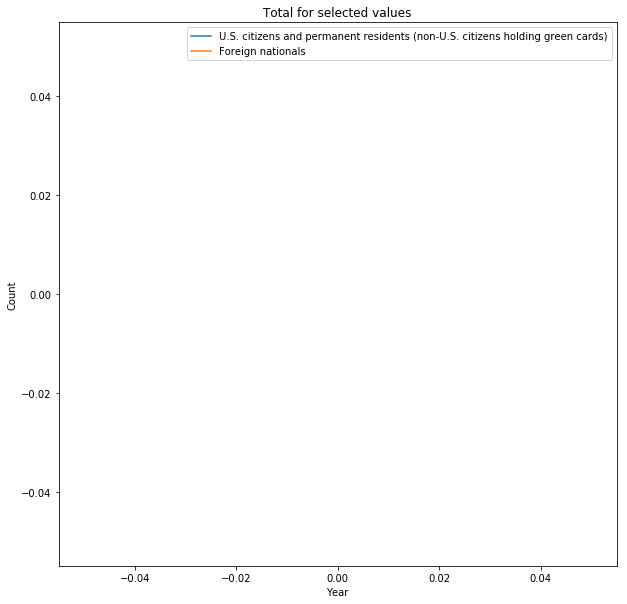

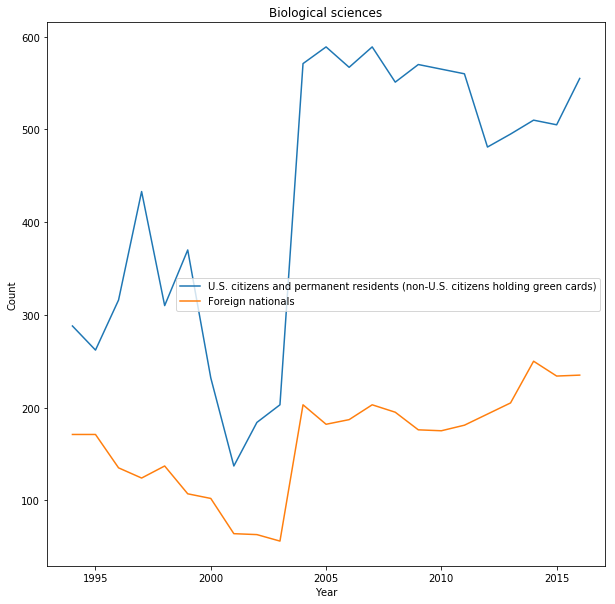

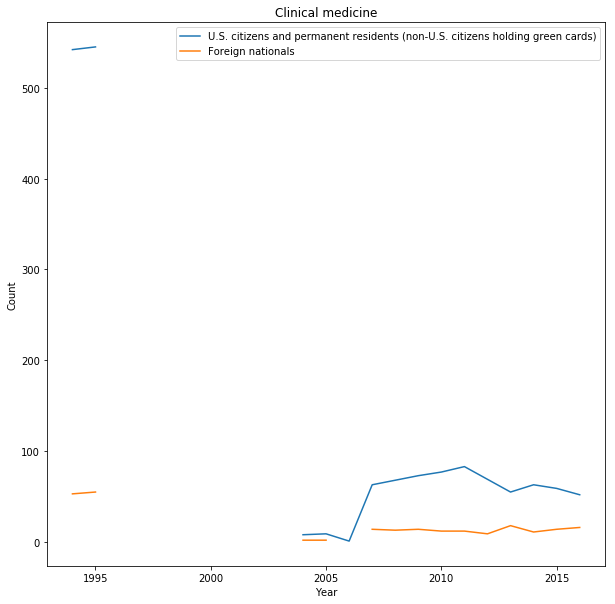

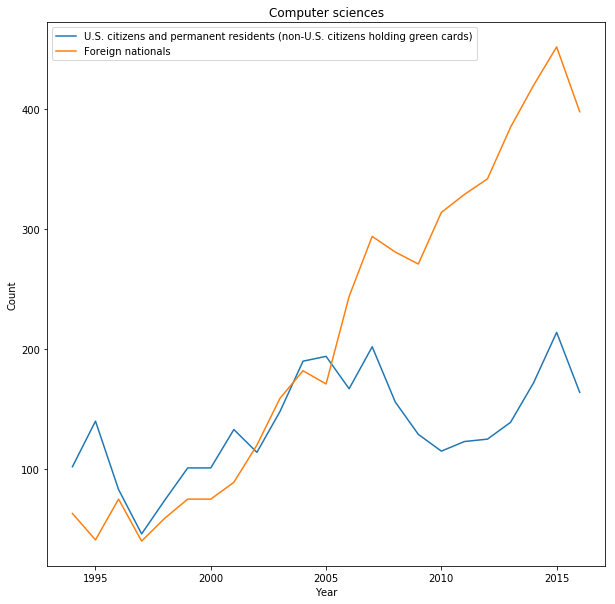

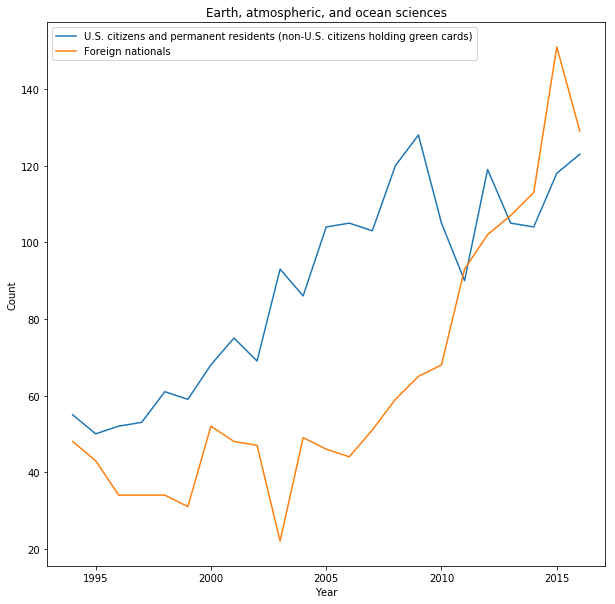

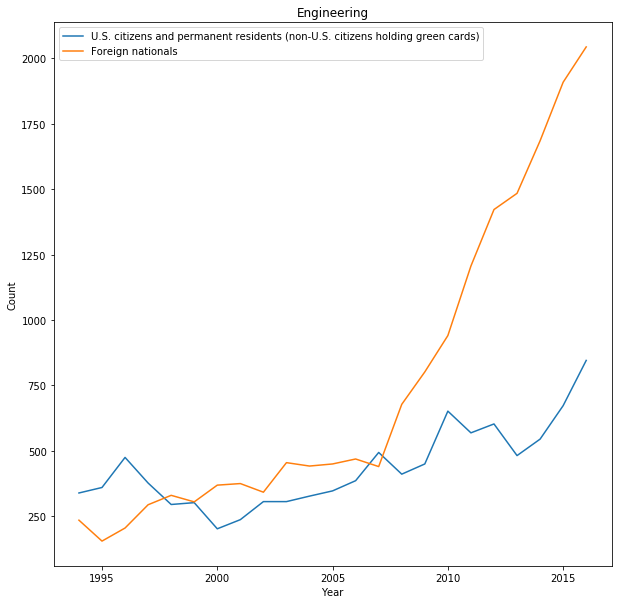

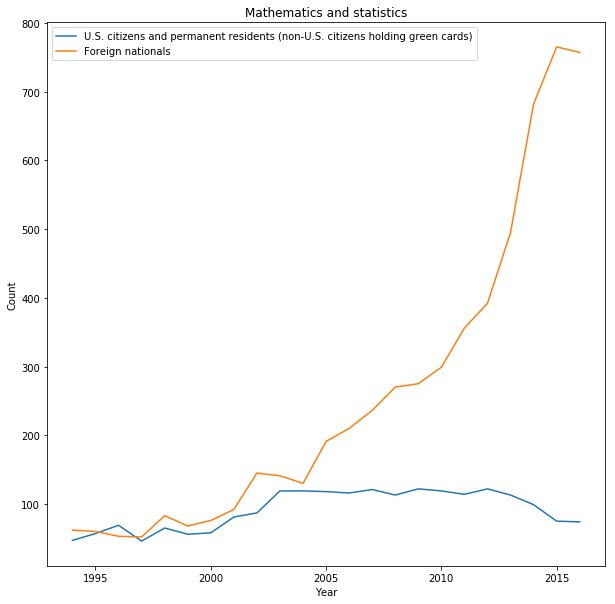

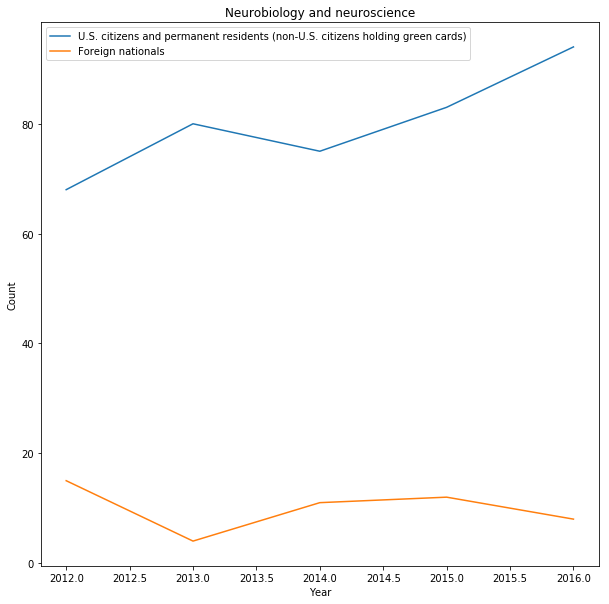

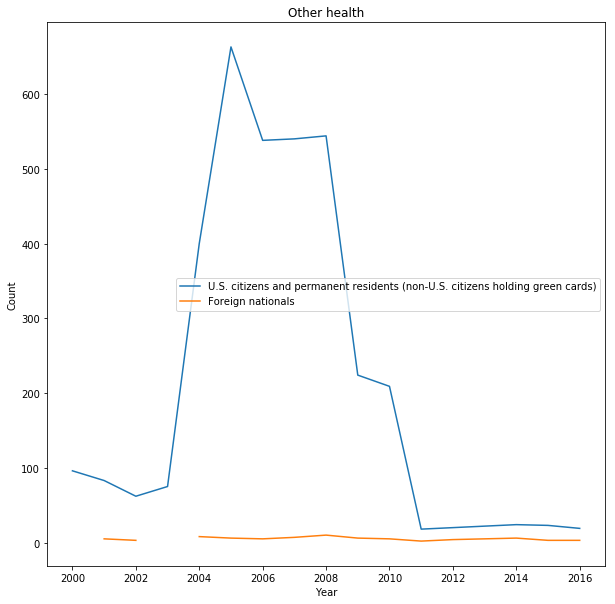

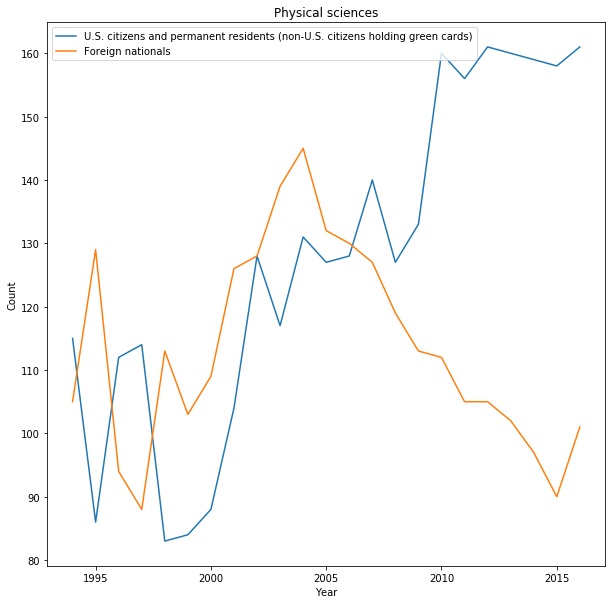

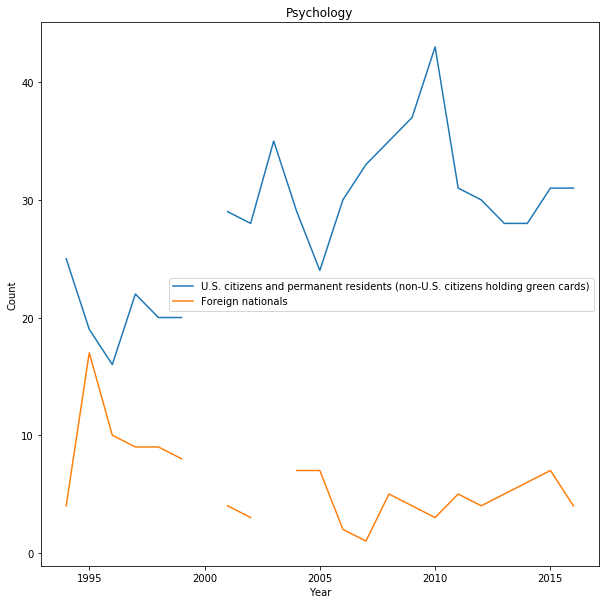

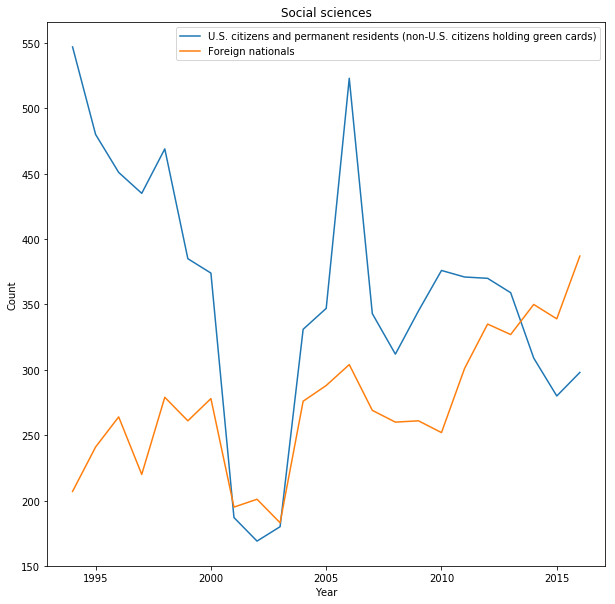

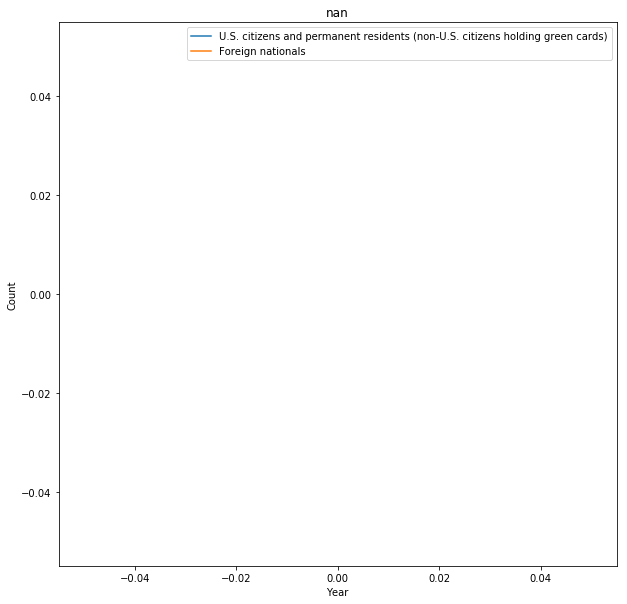

In [91]:
for f in df['Broad Fields'].unique():
    plotField(f)